# 이산 확률 변수 X와 확률분포

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd

In [7]:
# 기대값
data = {
  '상금': [0, 100, 1000], #X
  '확률': [0.5, 0.3, 0.2] #f(X)
}
df = pd.DataFrame(data)
df['exp_value'] = df['상금']*df['확률']
print(f'복권의 기대값 : {df['exp_value'].sum()} 원')

복권의 기대값 : 230.0 원


# 이산확률분포

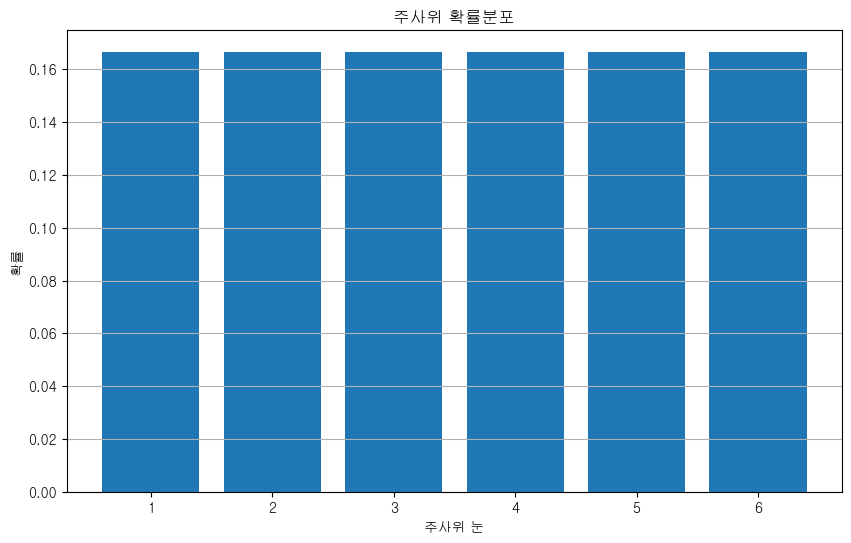

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 주사위 눈 (1~6)
x = np.arange(1, 7)
# 공정한 주사위의 확률분포: 모두 1/6
probs = [1/6] * 6  #6을 곱하는 이유는  6번 반복해서 리스트로 만든다는 의미 - 각 눈별로 확률이 동일하므로 모두 1/6로 설정

# 시각화
plt.bar(x, probs)
plt.xticks(x)
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 확률분포")
plt.grid(axis='y')
plt.show()

In [ ]:
# 베르누이 분포 예시 - 동전 던지기
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 베르누이 분포 파라미터 설정
p = 0.5  # 앞면이 나올 확률

# 베르누이 확률변수 생성
X = bernoulli(p)
X #베르누이 확률모델

In [ ]:
# 1회 시행 결과 시뮬레이션 (0: 뒷면, 1: 앞면)
result = X.rvs(size=1)
print(f"동전 1회 던지기 결과: {'앞면' if result[0] == 1 else '뒷면'}")

동전 1회 던지기 결과: 뒷면


In [ ]:
# 여러 번 시행 결과 시뮬레이션
n_trials = 1000
results = X.rvs(size=n_trials)
np.sum(results) #앞면인 횟수 > 성공

np.int64(513)

In [13]:
# 결과 분석
success_count = np.sum(results)
success_rate = success_count / n_trials
success_rate

np.float64(0.513)

In [ ]:
print(f"1000번 던졌을 때 앞면 나온 횟수: {success_count}")
print(f"앞면 나올 확률 (이론값: {p}, 실험값: {success_rate:.4f})")

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([0, 1], [1-p, p], color=['blue', 'red'])
plt.xticks([0, 1], ['뒷면 (0)', '앞면 (1)'])
plt.ylabel('확률')
plt.title('베르누이 분포 (p=0.5인 동전 던지기)')
plt.show()


# 이항분포

n번, m번 성공횟수

In [14]:
from scipy.stats import binom

In [17]:
#동전 10번, 앞면 5번 나올 확률
n=10
p=0.5
#X = bernoulli(p)
X = binom(n,p)
k_values = np.arange(0,n+1)
pmf_values = X.pmf(k_values)


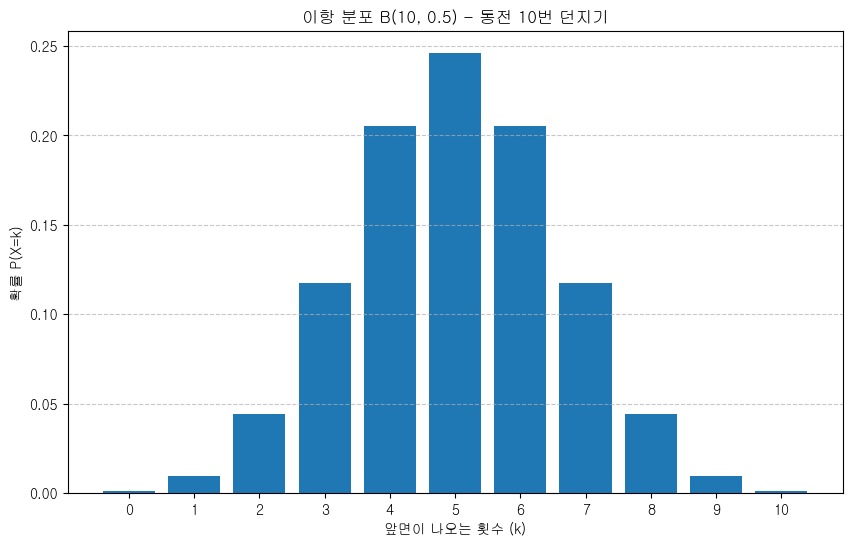

In [20]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('확률 P(X=k)')
plt.title(f'이항 분포 B({n}, {p}) - 동전 10번 던지기')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 이항분포를 적용할 수 있는 사례

1. 시험 합격률이 70%, 100명, 80명 이상 합격할 확률
2. 불량률 5%, 20개 샘플, 불량제품이 2개 이하일 확률

In [26]:
#1. 시험 합격률이 70%, 100명, 80명 이상 합격할 확률

N=100
P=0.7
K=79

P_79_less = binom.cdf(K,N,P)
P_80_more = 1- P_79_less
print(f'80명 이상 합격할 확률은 {P_80_more:.4f}')

80명 이상 합격할 확률은 0.0165


In [35]:
from scipy.stats import norm

In [36]:
mu = N * P
sigma = np.sqrt( N * P * (1 - P))

# 연속성 보정: P(X >= 80) ≈ P(X >= 79.5)
z = (79.5 - mu) / sigma
prob_norm = 1 - norm.cdf(z)

print(f"[정규 근사] 80명 이상 확률: {prob_norm:.4f}")


[정규 근사] 80명 이상 확률: 0.0191


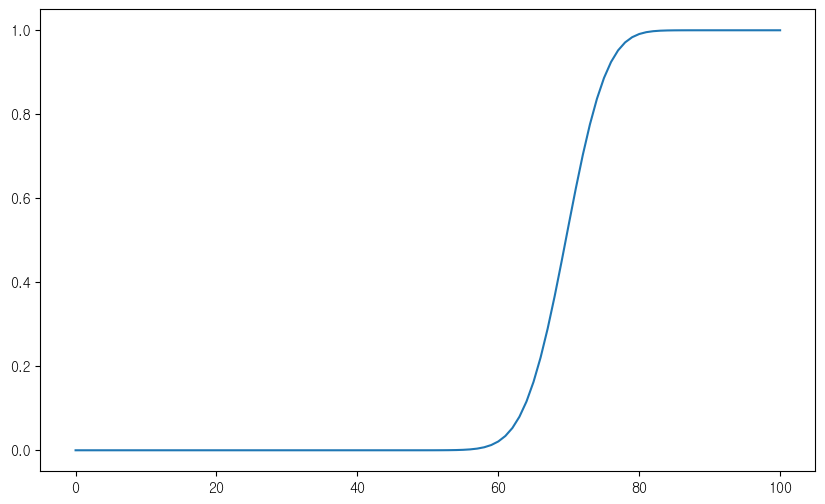

In [30]:
X = np.arange(0, N+1)
cdf_values = binom.cdf(X, N, P)

plt.plot(X, cdf_values)
plt.show()

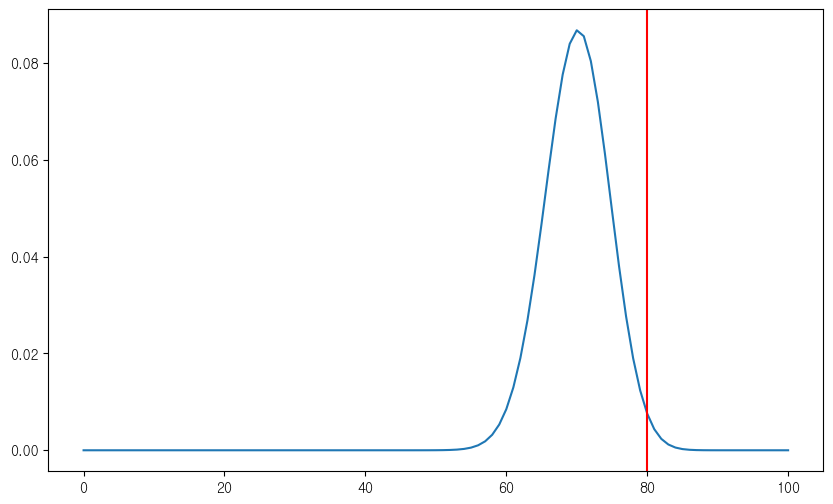

In [ ]:
X = np.arange(0, N+1)

pmf_values = binom.pmf(X, N, P)

plt.plot(X, pmf_values)
plt.axvline(80, color='red')
plt.show()

2. 불량률 5%, 20개 샘플, 불량제품이 2개 이하일 확률

In [37]:
n=20
p=0.05
prob = binom.cdf(2,n,p)
prob

np.float64(0.9245163262115037)

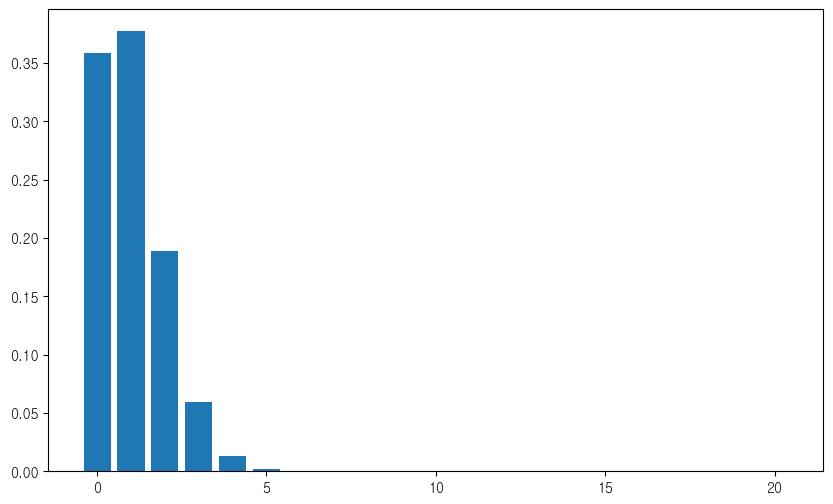

In [38]:
# 확률분포
X = np.arange(0,n+1)
P_values = binom.pmf(X,n,p)
plt.bar(X, P_values)
plt.show()

# 푸아송분포
정해진 시간, 면적내에서 확률 계산

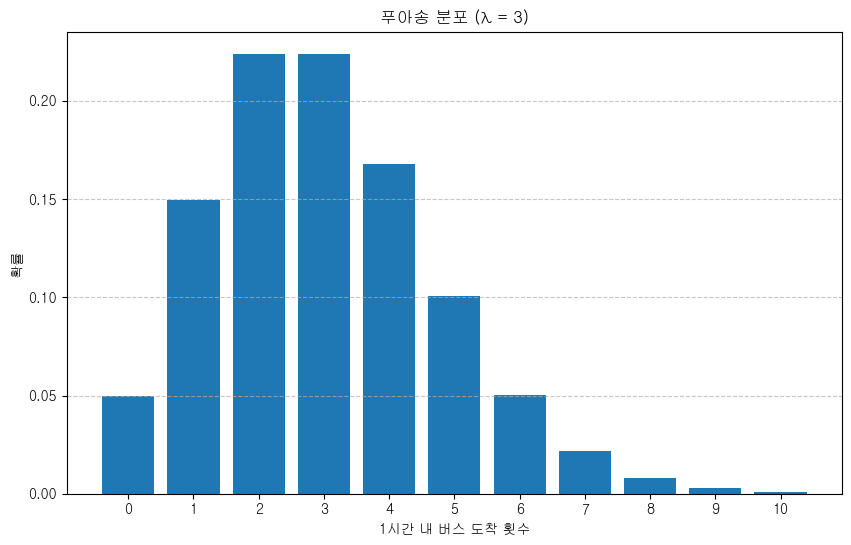

In [21]:
# 푸아송 분포 - 버스 도착 시뮬레이션
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 파라미터 설정
lambda_val = 3  # 1시간당 평균 버스 도착 횟수

# 푸아송 확률변수 생성
X = poisson(lambda_val)

# 가능한 버스 도착 횟수 (0부터 10까지)
k_values = np.arange(0, 11)

# 각 값에 대한 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('1시간 내 버스 도착 횟수')
plt.ylabel('확률')
plt.title(f'푸아송 분포 (λ = {lambda_val})')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

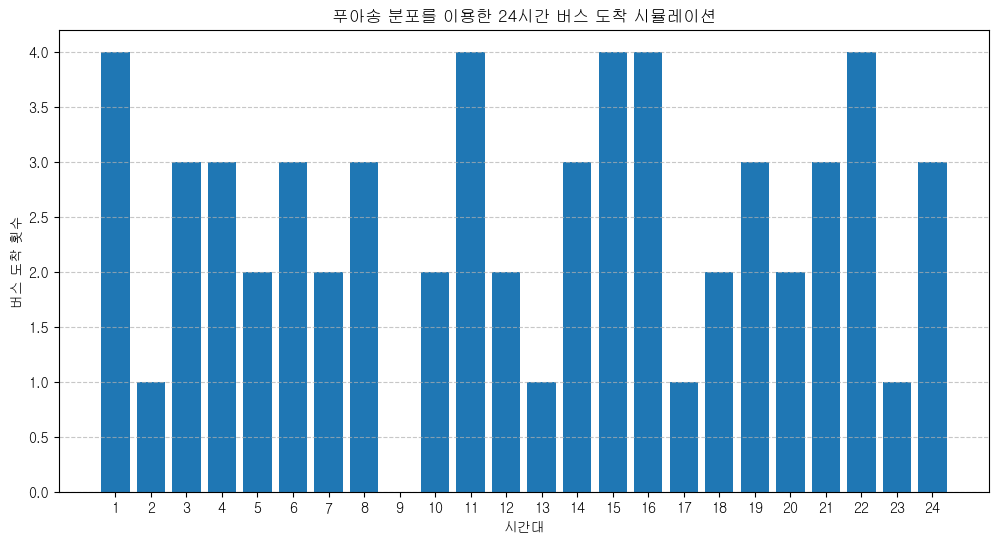

In [22]:
# 시뮬레이션: 하루(24시간) 동안의 버스 도착 패턴
np.random.seed(42)

hours = np.arange(1, 25)
arrivals = np.random.poisson(lambda_val, size=24)

plt.figure(figsize=(12, 6))
plt.bar(hours, arrivals)
plt.xlabel('시간대')
plt.ylabel('버스 도착 횟수')
plt.title('푸아송 분포를 이용한 24시간 버스 도착 시뮬레이션')
plt.xticks(hours)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 정규분포

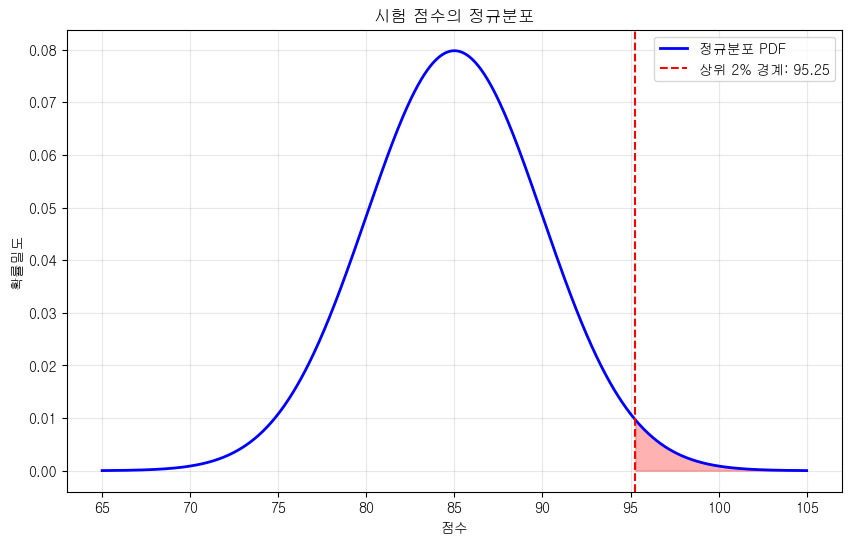

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 정규분포 예시 코드
mu = 85  # 평균
sigma = 5  # 표준편차

# 정규분포의 확률밀도함수
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# 상위 2%에 해당하는 점수 계산
z_score = 2.05
critical_value = mu + z_score * sigma

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', lw=2, label='정규분포 PDF')
plt.axvline(critical_value, color='r', linestyle='--', label=f'상위 2% 경계: {critical_value:.2f}')
plt.fill_between(x, pdf, where=(x >= critical_value), alpha=0.3, color='r')

# 그래프 꾸미기
plt.title('시험 점수의 정규분포')
plt.xlabel('점수')
plt.ylabel('확률밀도')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


이산확률분포
-베르누이 : 성공|실패
-이항분포 : 횟수, 성공의 횟수를 모델링
-포아송분포 : 단위(시간/공간) 내에서 사건의 발생횟수를 모델링, 평균 발생율
-기하분포, 초기하분포, 다항분포

연속확률분포
- 정규분포: 평균 중심 - 좌우 대칭, 평균/표준편차
- 표준정규분포 : 평균0, 표준편차1인 정규분포 -> z점수로 확률값을 확인
- 카이제곱분포 : x의 제곱합, 분산을 분포화 - 적합도/동질성/분산(변동성), 자유도> 정규분포화
- f분포 : 두 분산의 비율 비교, ANOVA(3개 이상 그룹의 분산 비교)



In [ ]:
기계학습 
분류, 회귀 - 방정식 / 오차 > 정규 분포
시뮬레이션 - X를 추출
